In [2]:
import pyspark
import json

In [6]:
artists_data = json.load(open('artists_data.json'))
albums_data = json.load(open('albums_data.json'))
tracks_data = json.load(open('tracks_data.json'))
tracks_features_data = json.load(open('tracks_features_data.json'))

In [3]:
# Create SparkSession
spark = pyspark.sql.SparkSession.builder \
    .appName("JSON to DataFrame") \
    .getOrCreate()

23/12/04 01:06:26 WARN Utils: Your hostname, tntuan0910 resolves to a loopback address: 127.0.1.1; using 192.168.1.9 instead (on interface wlp0s20f3)
23/12/04 01:06:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/04 01:06:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
from pyspark.sql.types import StructType, StructField, DoubleType, BooleanType, StringType, IntegerType, LongType, ArrayType, DateType

artist_schema = StructType([
    StructField(
        "_id",
        StructType([
            StructField("$oid", StringType(), True)
        ])
    ),
    StructField(
        "external_urls",
        StructType([
            StructField("spotify", StringType(), True)
        ])
    ),
    StructField(
        "followers", 
        StructType([
            StructField("href", StringType(), True),
            StructField("total", IntegerType(), True)
        ])
    ),
    StructField(
        "genres",
        ArrayType(StringType(), True)      
    ),
    StructField("href", StringType(), True),
    StructField("id", StringType(), True),
    StructField(
        "images",
        ArrayType(
            StructType([
                StructField("height", IntegerType(), True),
                StructField("url", StringType(), True),
                StructField("width", IntegerType(), True)
            ])
        )
    ),
    StructField("name", StringType(), True),
    StructField("popularity", IntegerType(), True),
    StructField("type", StringType(), True),
    StructField("uri", StringType(), True)
])

album_schema = StructType([
    StructField(
        "_id",
        StructType([
            StructField("$oid", StringType(), True)
        ])
    ),
    StructField("album_group", StringType(), True),
    StructField("album_type", StringType(), True),
    StructField(
        "artists",
        ArrayType(
            StructType([
                StructField(
                    "external_urls",
                    StructType([
                        StructField("spotify", StringType(), True)
                    ])
                ),
                StructField("href", StringType(), True),
                StructField("id", StringType(), True),
                StructField("name", StringType(), True),
                StructField("type", StringType(), True),
                StructField("uri", StringType(), True)
            ])
        )
    ),
    StructField(
        "available_markets",
        ArrayType(StringType(), True)
    ),
    StructField(
        "external_urls",
        StructType([
            StructField("spotify", StringType(), True)
        ])
    ),
    StructField("href", StringType(), True),
    StructField("id", StringType(), True),
    StructField(
        "images",
        ArrayType(
            StructType([
                StructField("height", IntegerType(), True),
                StructField("url", StringType(), True),
                StructField("width", IntegerType(), True)
            ])
        )
    ),
    StructField("name", StringType(), True),
    StructField("release_date", DateType(), True),
    StructField("release_date_precision", StringType(), True),
    StructField("total_tracks", IntegerType(), True),
    StructField("type", StringType(), True),
    StructField("uri", StringType(), True)
])

track_schema = StructType([
    StructField(
        "_id",
        StructType([
            StructField("$oid", StringType(), True)
        ])
    ),
    StructField(
        "artists",
        ArrayType(
            StructType([
                StructField(
                    "external_urls",
                    StructType([
                        StructField("spotify", StringType(), True)
                    ])
                ),
                StructField("href", StringType(), True),
                StructField("id", StringType(), True),
                StructField("name", StringType(), True),
                StructField("type", StringType(), True),
                StructField("uri", StringType(), True)
            ])
        )
    ),
    StructField(
        "available_markets", 
        ArrayType(StringType(), True)
    ),
    StructField("disc_number", IntegerType(), True),
    StructField("duration_ms", LongType(), True),
    StructField("explicit", BooleanType(), True),
    StructField(
        "external_urls",
        StructType([
            StructField("spotify", StringType(), True)
        ])
    ),
    StructField("href", StringType(), True),
    StructField("id", StringType(), True),
    StructField("is_local", BooleanType(), True),
    StructField("name", StringType(), True),
    StructField("preview_url", StringType(), True),
    StructField("track_number", IntegerType(), True),
    StructField("type", StringType(), True),
    StructField("uri", StringType(), True)
])

track_features_schema = StructType([
    StructField(
        "_id",
        StructType([
            StructField("$oid", StringType(), True)
        ])
    ),
    StructField("danceability", DoubleType(), True),
    StructField("energy", DoubleType(), True),
    StructField("key", IntegerType(), True),
    StructField("loudness", DoubleType(), True),
    StructField("mode", IntegerType(), True),
    StructField("speechiness", DoubleType(), True),
    StructField("acousticness", DoubleType(), True),
    StructField("instrumentalness", DoubleType(), True),
    StructField("liveness", DoubleType(), True),
    StructField("valence", DoubleType(), True),
    StructField("tempo", DoubleType(), True),
    StructField("type", StringType(), True),
    StructField("id", StringType(), True),
    StructField("uri", StringType(), True),
    StructField("track_href", StringType(), True),
    StructField("analysis_url", StringType(), True),
    StructField("duration_ms", LongType(), True),
    StructField("time_signature", IntegerType(), True)
])

In [7]:
def read_dataframe(data):
    data_json = json.dumps(data)
    return spark.read.json(spark.sparkContext.parallelize([data_json]))

In [8]:
artists_df = read_dataframe(artists_data)
albums_df = read_dataframe(albums_data)
tracks_df = read_dataframe(tracks_data)
tracks_features_df = read_dataframe(tracks_features_data)

23/12/04 01:07:27 WARN TaskSetManager: Stage 1 contains a task of very large size (1061 KiB). The maximum recommended task size is 1000 KiB.
23/12/04 01:07:28 WARN TaskSetManager: Stage 2 contains a task of very large size (8579 KiB). The maximum recommended task size is 1000 KiB.
23/12/04 01:07:31 WARN TaskSetManager: Stage 3 contains a task of very large size (7502 KiB). The maximum recommended task size is 1000 KiB.


## Basic opertation

In [53]:
# Print first 5 rows
artists_df.head(5)

[Row(_id=Row($oid='656368ddc946691a6054f1ef'), external_urls=Row(spotify='https://open.spotify.com/artist/5fbhwqYYh4YwUoEs582mq5'), followers=Row(href=None, total=893742), genres=['classic soul', 'disco', 'funk', 'motown', 'philly soul', 'quiet storm', 'soul', 'southern soul'], href='https://api.spotify.com/v1/artists/5fbhwqYYh4YwUoEs582mq5', id='5fbhwqYYh4YwUoEs582mq5', images=[Row(height=400, url='https://i.scdn.co/image/9c5f33797bb3d476c471ee218409b54caccd7c7e', width=400), Row(height=200, url='https://i.scdn.co/image/ae45cbee57c4c2ce2475ad84e75bcc14b3fff3a2', width=200), Row(height=64, url='https://i.scdn.co/image/9b72fb389db39a942f59bb01bb92ef5a429b8b34', width=64)], name='The Spinners', popularity=58, type='artist', uri='spotify:artist:5fbhwqYYh4YwUoEs582mq5'),
 Row(_id=Row($oid='656368ddc946691a6054f1ec'), external_urls=Row(spotify='https://open.spotify.com/artist/267VY6GX5LyU5c9M85ECZQ'), followers=Row(href=None, total=505224), genres=['alternative rock', 'lo-fi', 'noise pop', 

In [54]:
# List of columns
artists_df.columns

['_id',
 'external_urls',
 'followers',
 'genres',
 'href',
 'id',
 'images',
 'name',
 'popularity',
 'type',
 'uri']

In [55]:
# Loop through all values of column external_urls
for row in artists_df.select("external_urls").collect():
    # Extract url
    url = row.external_urls.spotify
    print(row)

Row(external_urls=Row(spotify='https://open.spotify.com/artist/5fbhwqYYh4YwUoEs582mq5'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/267VY6GX5LyU5c9M85ECZQ'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/121Q6oslYCMBYZHhOFL1RB'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/6rxxu32JCGDpKKMPHxnSJp'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/7De2eIqeHTw091YeAkkYXV'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/3G3Gdm0ZRAOxLrbyjfhii5'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/0EodhzA6yW1bIdD5B4tcmJ'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/0WwSkZ7LtFUFjGjMZBMt6T'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/0z6zRFzl5njXWLVAisXQBz'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/6vwFR7NilfrQ4AX0d41fWu'))
Row(external_urls=Row(spotify='https://open.spotify.com/artist/2h9yQhKyqOMex3QFMVeq7F'))
Row(external_urls=Row

In [56]:
columns_to_remove = ["_id", "external_urls", "followers", "genres", "href", "images", "type", "uri"]

In [57]:
artists_df.head(5)

[Row(_id=Row($oid='656368ddc946691a6054f1ef'), external_urls=Row(spotify='https://open.spotify.com/artist/5fbhwqYYh4YwUoEs582mq5'), followers=Row(href=None, total=893742), genres=['classic soul', 'disco', 'funk', 'motown', 'philly soul', 'quiet storm', 'soul', 'southern soul'], href='https://api.spotify.com/v1/artists/5fbhwqYYh4YwUoEs582mq5', id='5fbhwqYYh4YwUoEs582mq5', images=[Row(height=400, url='https://i.scdn.co/image/9c5f33797bb3d476c471ee218409b54caccd7c7e', width=400), Row(height=200, url='https://i.scdn.co/image/ae45cbee57c4c2ce2475ad84e75bcc14b3fff3a2', width=200), Row(height=64, url='https://i.scdn.co/image/9b72fb389db39a942f59bb01bb92ef5a429b8b34', width=64)], name='The Spinners', popularity=58, type='artist', uri='spotify:artist:5fbhwqYYh4YwUoEs582mq5'),
 Row(_id=Row($oid='656368ddc946691a6054f1ec'), external_urls=Row(spotify='https://open.spotify.com/artist/267VY6GX5LyU5c9M85ECZQ'), followers=Row(href=None, total=505224), genres=['alternative rock', 'lo-fi', 'noise pop', 

In [58]:
from pyspark.sql.functions import column
artists_df.withColumn("url", column("external_urls.spotify")).show()

+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+------+--------------------+--------------------+
|                 _id|       external_urls|      followers|              genres|                href|                  id|              images|                name|popularity|  type|                 uri|                 url|
+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+------+--------------------+--------------------+
|{656368ddc946691a...|{https://open.spo...| {NULL, 893742}|[classic soul, di...|https://api.spoti...|5fbhwqYYh4YwUoEs5...|[{400, https://i....|        The Spinners|        58|artist|spotify:artist:5f...|https://open.spot...|
|{656368ddc946691a...|{https://open.spo...| {NULL, 505224}|[alternative rock...|https://api.spoti...

In [59]:
markets = ["AD", "AE", "AG", "AL", "AM", "AO", "AR", "AT", "AU", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BN", "BO", "BR", "BS", "BT", "BW", "BY", "BZ", "CA", "CD", "CG", "CH", "CI", "CL", "CM", "CO", "CR", "CV", "CW", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "ES", "ET", "FI", "FJ", "FM", "FR", "GA", "GB", "GD", "GE", "GH", "GM", "GN", "GQ", "GR", "GT", "GW", "GY", "HK", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IN", "IQ", "IS", "IT", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KR", "KW", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MG", "MH", "MK", "ML", "MN", "MO", "MR", "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NE", "NG", "NI", "NL", "NO", "NP", "NR", "NZ", "OM", "PA", "PE", "PG", "PH", "PK", "PL", "PS", "PT", "PW", "PY", "QA", "RO", "RS", "RW", "SA", "SB", "SC", "SE", "SG", "SI", "SK", "SL", "SM", "SN", "SR", "ST", "SV", "SZ", "TD", "TG", "TH", "TJ", "TL", "TN", "TO", "TR", "TT", "TV", "TW", "TZ", "UA", "UG", "US", "UY", "UZ", "VC", "VE", "VN", "VU", "WS", "XK", "ZA", "ZM", "ZW"]
genres = ["acoustic", "afrobeat", "alt-rock", "alternative", "ambient", "anime", "black-metal", "bluegrass", "blues", "bossanova", "brazil", "breakbeat", "british", "cantopop", "chicago-house", "children", "chill", "classical", "club", "comedy", "country", "dance", "dancehall", "death-metal", "deep-house", "detroit-techno", "disco", "disney", "drum-and-bass", "dub", "dubstep", "edm", "electro", "electronic", "emo", "folk", "forro", "french", "funk", "garage", "german", "gospel", "goth", "grindcore", "groove", "grunge", "guitar", "happy", "hard-rock", "hardcore", "hardstyle", "heavy-metal", "hip-hop", "holidays", "honky-tonk", "house", "idm", "indian", "indie", "indie-pop", "industrial", "iranian", "j-dance", "j-idol", "j-pop", "j-rock", "jazz", "k-pop", "kids", "latin", "latino", "malay", "mandopop", "metal", "metal-misc", "metalcore", "minimal-techno", "movies", "mpb", "new-age", "new-release", "opera", "pagode", "party", "philippines-opm", "piano", "pop", "pop-film", "post-dubstep", "power-pop", "progressive-house", "psych-rock", "punk", "punk-rock", "r-n-b", "rainy-day", "reggae", "reggaeton", "road-trip", "rock", "rock-n-roll", "rockabilly", "romance", "sad", "salsa", "samba", "sertanejo", "show-tunes", "singer-songwriter", "ska", "sleep", "songwriter", "soul", "soundtracks", "spanish", "study", "summer", "swedish", "synth-pop", "tango", "techno", "trance", "trip-hop", "turkish", "work-out", "world-music"]

## Clean artist

In [7]:
from pyspark.sql.functions import array_contains, col, explode
from typing import List, Dict

In [10]:
# def clean_list_value_df(df: pyspark.sql.DataFrame, column: str, unique_items: List) -> pyspark.sql.DataFrame:
#     cleaned_df = df
#     for item in unique_items:
#         cleaned_df = cleaned_df.withColumn(item, array_contains(col(column), item))
#     return cleaned_df

In [11]:
# # Extract artists's url from external_urls column
# cleaned_urls_artists_df = artists_df.withColumn("external_urls", col("external_urls.spotify"))

In [12]:
# # Extract artists's total followers from followers column
# cleaned_followers_artists_df = cleaned_urls_artists_df.withColumn("followers", col("followers.total"))

In [13]:
# # Extract artists's first images from images column
# cleaned_images_artists_df = cleaned_followers_artists_df.withColumn("image", col("images")[0].url)

In [14]:
# # Rename id columns
# cleaned_id_artists_df = cleaned_images_artists_df.withColumnRenamed("id", "artist_id")

In [15]:
# # Extract artists's genres from genres column
# unique_genres = artists_df.select(col("genres")).rdd.flatMap(lambda x: x[0]).distinct().collect()
# cleaned_genres_artists_df = clean_list_value_df(cleaned_id_artists_df, "genres", unique_genres)

In [16]:
# # Remove unnecessary columns
# columns_to_remove = ["_id", "genres", "href", "images", "type", "uri"]
# cleaned_artist_df = cleaned_genres_artists_df.drop(*columns_to_remove)

In [8]:
def cleanList(self, columns: dict, drop: bool=False):
    # Check type of argument
    if not isinstance(columns, dict):
        raise TypeError("Columns must be a dictionary")
    if not isinstance(drop, bool):
        raise TypeError("Drop must be a boolean")
    
    df_exploded = self
    
    for old_column in columns.keys():
        new_column = columns[old_column]
        df_exploded = df_exploded.select("*", explode(col(old_column)).alias(new_column))
    
    if drop:
        return df_exploded.drop(*columns.keys())
    return df_exploded

pyspark.sql.DataFrame.cleanList = cleanList

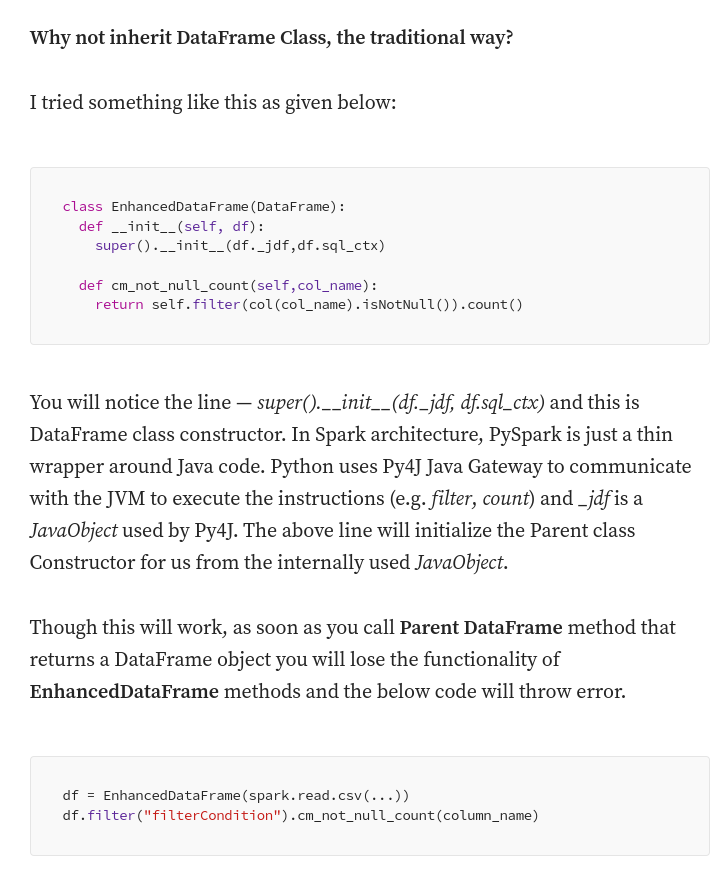

In [9]:
class CleanDataframe:
    def __init__(self, df: pyspark.sql.DataFrame):
        self.__df = df 
        
    def get_dataframe(self) -> pyspark.sql.DataFrame: 
        return self.__df
    
    
class SilverCleanArtistDataframe(CleanDataframe):
    def __init__(self, df: pyspark.sql.DataFrame):
        super().__init__(df)
    
    def clean(self) -> pyspark.sql.DataFrame:
        # Get the dataframe
        cleaned_df = self.get_dataframe()
        
        # Extract artists's url from external_urls column 
        
        cleaned_df = cleaned_df.withColumn("external_urls", col("external_urls.spotify"))
        
        # Extract artists's total followers from followers column
        cleaned_df = cleaned_df.withColumn("followers", col("followers.total"))
        
        # Extract artists's first images from images column
        cleaned_df = cleaned_df.withColumn("image_url", col("images")[0].url)
        
        # Rename id columns
        cleaned_df = cleaned_df.withColumnRenamed("id", "artist_id")
        
        # Extract artists's genres from genres column
        cleaned_df = cleaned_df.cleanList({"genres": "genre"})
        
        # Split artist and genres into different dataframe
        artists_df = cleaned_df.select("artist_id", "external_urls", "followers", "href", "image_url", "name", "popularity", "type", "uri")
        genres_df = cleaned_df.select("artist_id", "genre")
        return artists_df, genres_df
    
class CleanAlbumDataframe(CleanDataframe):
    def __init__(self, df: pyspark.sql.DataFrame):
        super().__init__(df)
        
    def clean(self) -> pyspark.sql.DataFrame:
        # Get the dataframe
        cleaned_df = self.get_dataframe()
        
        # Extract artists's id from artists column
        cleaned_df = cleaned_df.withColumn("artist_id", col("artists")[0].id)
        
        # Extract albums's url from external_urls column
        cleaned_df = cleaned_df.withColumn("external_urls", col("external_urls.spotify")) 
        
        # Extract albums's first images from images column
        cleaned_df = cleaned_df.withColumn("image_url", col("images")[0].url)
        
        # Rename id columns
        cleaned_df = cleaned_df.withColumnRenamed("id", "album_id")
        
        # Extract albums's available markets from available_markets column
        cleaned_df = cleaned_df.cleanList({"available_markets": "available_market"})
        
        # # Remove unnecessary columns
        # columns_to_remove = ["_id", "artists", "available_markets", "href", "images", "type", "uri"]
        # cleaned_df = cleaned_df.drop(*columns_to_remove)
        return cleaned_df
    
class CleanTrackDataframe(CleanDataframe):
    def __init__(self, df: pyspark.sql.DataFrame):
        super().__init__(df)
    
    def clean(self) -> pyspark.sql.DataFrame:
        # Get the dataframe
        cleaned_df = self.get_dataframe()
        
        # Extract artists's id from artists column
        cleaned_df = cleaned_df.withColumn("artist_id", col("artists")[0].id)
        
        # Extract tracks's url from external_urls column
        cleaned_df = cleaned_df.withColumn("external_urls", col("external_urls.spotify")) 
        
        # Rename id columns
        cleaned_df = cleaned_df.withColumnRenamed("id", "track_id")
        
        # Extract tracks's available markets from available_markets column
        cleaned_df = cleaned_df.cleanList({"available_markets": "available_market"})
        
        # # Remove unnecessary columns
        # columns_to_remove = ["_id", "artists", "available_markets", "duration_ms", "href", "is_local", "type", "uri"]
        # cleaned_df = cleaned_df.drop(*columns_to_remove)
        return cleaned_df
    
class CleanTrackFeaturesDataframe(CleanDataframe):
    def __init__(self, df: pyspark.sql.DataFrame):
        super().__init__(df)
    
    def clean(self) -> pyspark.sql.DataFrame:
        # Get the dataframe
        cleaned_df = self.get_dataframe()
        
        # Rename id columns
        cleaned_df = cleaned_df.withColumnRenamed("id", "track_id")
        
        # # Remove unnecessary columns
        # columns_to_remove = ["_id", "type", "uri", "track_href", "analysis_url"]
        # cleaned_df = cleaned_df.drop(*columns_to_remove)
        return cleaned_df

In [11]:
card = SilverCleanArtistDataframe(artists_df)
cleaned_artist_df, cleaned_artist_genres_df = card.clean()
cleaned_artist_df.show(5)

+--------------------+--------------------+---------+--------------------+--------------------+------------+----------+------+--------------------+
|           artist_id|       external_urls|followers|                href|           image_url|        name|popularity|  type|                 uri|
+--------------------+--------------------+---------+--------------------+--------------------+------------+----------+------+--------------------+
|5fbhwqYYh4YwUoEs5...|https://open.spot...|   893742|https://api.spoti...|https://i.scdn.co...|The Spinners|        58|artist|spotify:artist:5f...|
|5fbhwqYYh4YwUoEs5...|https://open.spot...|   893742|https://api.spoti...|https://i.scdn.co...|The Spinners|        58|artist|spotify:artist:5f...|
|5fbhwqYYh4YwUoEs5...|https://open.spot...|   893742|https://api.spoti...|https://i.scdn.co...|The Spinners|        58|artist|spotify:artist:5f...|
|5fbhwqYYh4YwUoEs5...|https://open.spot...|   893742|https://api.spoti...|https://i.scdn.co...|The Spinners|    

In [12]:
cleaned_artist_genres_df.show(5)

+--------------------+------------+
|           artist_id|       genre|
+--------------------+------------+
|5fbhwqYYh4YwUoEs5...|classic soul|
|5fbhwqYYh4YwUoEs5...|       disco|
|5fbhwqYYh4YwUoEs5...|        funk|
|5fbhwqYYh4YwUoEs5...|      motown|
|5fbhwqYYh4YwUoEs5...| philly soul|
+--------------------+------------+
only showing top 5 rows



In [171]:
cald = CleanAlbumDataframe(albums_df)
cleaned_album_df = cald.clean()
cleaned_album_df.show(5)

23/12/02 21:47:02 WARN TaskSetManager: Stage 135 contains a task of very large size (2083 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+----------------------+------------+-----+--------------------+--------------------+--------------------+----------------+
|                 _id|album_group|album_type|             artists|   available_markets|       external_urls|                href|            album_id|              images|                name|release_date|release_date_precision|total_tracks| type|                 uri|           artist_id|           image_url|available_market|
+--------------------+-----------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+----------------------+------------+-----+--------------------+--------------------+--------------------+----------------+
|{656368dec94669

In [172]:
ctrd = CleanTrackDataframe(tracks_df)
cleaned_track_df = ctrd.clean()
cleaned_track_df.show(5)

23/12/02 21:47:02 WARN TaskSetManager: Stage 138 contains a task of very large size (26993 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------------------+--------------------+-----------+-----------+--------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+------------+-----+--------------------+--------------------+----------------+
|                 _id|             artists|   available_markets|disc_number|duration_ms|explicit|       external_urls|                href|            track_id|is_local|                name|         preview_url|track_number| type|                 uri|           artist_id|available_market|
+--------------------+--------------------+--------------------+-----------+-----------+--------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+------------+-----+--------------------+--------------------+----------------+
|{656368e0c946691a...|[{{https://open.s...|[AR, AU, AT, BE, ...|          1|     217031|   false|https://open.spot...|https://api.

In [173]:
ctfd = CleanTrackFeaturesDataframe(tracks_features_df)
cleaned_track_features_df = ctfd.clean()
cleaned_track_features_df.show(5)

23/12/02 21:47:04 WARN TaskSetManager: Stage 141 contains a task of very large size (7706 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------+
|                 _id|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|          type|            track_id|                 uri|          track_href|        analysis_url|duration_ms|time_signature|
+--------------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------+
|{656368eac946691a...|       0.235|  0.41|  8| -12.264|   0|     0.0304|        0.39|         5.48E-5|   0.118|  0.221| 95.873|audio_features|3c5QeZvMs3lXNpHIn...|spotify:track:3c5...|https://api.spoti...|https://api.spoti...|     147813|

## Clean album

In [69]:
# Extract artists's id from artists column
cleaned_artists_id_albums_df = albums_df.withColumn("artist_id", col("artists")[0].id)

In [70]:
# Extract albums's url from external_urls column
cleaned_urls_albums_df = cleaned_artists_id_albums_df.withColumn("external_urls", col("external_urls.spotify")) 

In [71]:
# Extract albums's first images from images column
cleaned_images_albums_df = cleaned_urls_albums_df.withColumn("image", col("images")[0].url)

In [72]:
# Rename id columns
cleaned_id_albums_df = cleaned_images_albums_df.withColumnRenamed("id", "album_id")

In [73]:
# Extract albums's available markets from available_markets column
unique_markets = albums_df.select(col("available_markets")).rdd.flatMap(lambda x: x[0]).distinct().collect()
cleaned_markets_albums_df = clean_list_value_df(cleaned_id_albums_df, "available_markets", unique_markets)

23/11/30 20:38:36 WARN TaskSetManager: Stage 54 contains a task of very large size (2083 KiB). The maximum recommended task size is 1000 KiB.


['_id', 'album_group', 'album_type', 'artists', 'available_markets', 'external_urls', 'href', 'album_id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri', 'artist_id', 'image', 'AT', 'BR', 'BG', 'CO', 'LV', 'MY', 'NZ', 'CH', 'ZA', 'EG', 'IN', 'AL', 'AM', 'FJ', 'MV', 'SL', 'SB', 'GN', 'KG', 'LA', 'MR', 'MU', 'AO', 'CI', 'CG', 'TJ', 'VE', 'ET', 'CL', 'EC', 'HN', 'HK', 'NO', 'PL', 'US', 'TH', 'OM', 'DZ', 'GH', 'BB', 'BF', 'GY', 'KI', 'NE', 'PG', 'SZ', 'TG', 'AR', 'CZ', 'EE', 'HU', 'IE', 'MT', 'PA', 'AD', 'LI', 'JP', 'TN', 'PS', 'BY', 'TZ', 'BW', 'DM', 'ML', 'PW', 'AZ', 'KH', 'GQ', 'CY', 'SV', 'GT', 'IS', 'SE', 'TR', 'IL', 'SA', 'AE', 'KZ', 'LK', 'AG', 'CV', 'LS', 'LR', 'MW', 'KN', 'TO', 'TT', 'TD', 'KM', 'AU', 'CA', 'DK', 'FI', 'SK', 'LB', 'UA', 'HR', 'PK', 'GM', 'GD', 'MH', 'NR', 'WS', 'SN', 'SC', 'MO', 'BJ', 'MG', 'MZ', 'CD', 'BE', 'DE', 'LU', 'NL', 'NI', 'PE', 'SG', 'ES', 'GB', 'MC', 'RO', 'BA', 'ME', 'SI', 'UG', 'BZ', 'BT', 'CW', 'NA', 'TV', '

In [74]:
# Remove unnecessary columns
columns_to_remove = ["_id", "artists", "available_markets", "href", "images", "type", "uri"]
cleaned_albums_df = cleaned_markets_albums_df.drop(*columns_to_remove)

In [75]:
cleaned_albums_df.show(5)

23/11/30 20:38:53 WARN TaskSetManager: Stage 58 contains a task of very large size (2083 KiB). The maximum recommended task size is 1000 KiB.


+-----------+----------+--------------------+--------------------+--------------------+------------+----------------------+------------+--------------------+--------------------+----+----+----+----+----+----+----+----+----+----+----+-----+-----+----+-----+-----+-----+----+-----+-----+-----+----+-----+----+-----+-----+----+-----+----+----+----+----+----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+----+----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+-----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+----+-----+-----+-----+----+----+----+----+----+----+----+-----+-----+-----+----+----+-----+----+-----+-----+-----+-----+--

## Clean track

In [76]:
# Extract artists's id from artists column
cleaned_artists_id_tracks_df = tracks_df.withColumn("artist_id", col("artists")[0].id)

In [77]:
# Extract tracks's url from external_urls column
cleaned_urls_tracks_df = cleaned_artists_id_tracks_df.withColumn("external_urls", col("external_urls.spotify"))

In [78]:
# Rename id columns
cleaned_id_tracks_df = cleaned_urls_tracks_df.withColumnRenamed("id", "track_id")

In [79]:
# Extract tracks's available markets from available_markets column
unique_markets = tracks_df.select(col("available_markets")).rdd.flatMap(lambda x: x[0]).distinct().collect()
cleaned_markets_tracks_df = clean_list_value_df(cleaned_id_tracks_df, "available_markets", unique_markets)

23/11/30 20:38:53 WARN TaskSetManager: Stage 59 contains a task of very large size (26993 KiB). The maximum recommended task size is 1000 KiB.


['_id', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'track_id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri', 'artist_id', 'AT', 'BR', 'BG', 'CO', 'LV', 'MY', 'NZ', 'CH', 'ZA', 'EG', 'IN', 'AL', 'AM', 'FJ', 'MV', 'SL', 'SB', 'GN', 'KG', 'LA', 'MR', 'MU', 'AO', 'CI', 'CG', 'TJ', 'VE', 'ET', 'CL', 'EC', 'HN', 'HK', 'NO', 'PL', 'TH', 'OM', 'DZ', 'GH', 'BB', 'BF', 'GY', 'KI', 'NE', 'PG', 'SZ', 'TG', 'US', 'AR', 'CZ', 'EE', 'HU', 'IE', 'MT', 'PA', 'AD', 'LI', 'JP', 'TN', 'PS', 'BY', 'TZ', 'BW', 'DM', 'ML', 'PW', 'AZ', 'KH', 'GQ', 'CY', 'SV', 'GT', 'IS', 'SE', 'TR', 'IL', 'SA', 'AE', 'KZ', 'LK', 'AG', 'CV', 'LS', 'LR', 'MW', 'KN', 'TO', 'TT', 'TD', 'KM', 'AU', 'DK', 'FI', 'SK', 'LB', 'UA', 'HR', 'PK', 'GM', 'GD', 'MH', 'NR', 'WS', 'SN', 'SC', 'MO', 'BJ', 'MG', 'MZ', 'CD', 'CA', 'BE', 'DE', 'LU', 'NL', 'NI', 'PE', 'SG', 'ES', 'GB', 'MC', 'RO', 'BA', 'ME', 'SI', 'UG', 'BZ', 'BT', 'CW', 'NA', 'TV', 'VU', 'RW', 'XK', 'BO'

In [80]:
# Remove unnecessary columns
columns_to_remove = ["_id", "artists", "available_markets", "duration_ms", "href", "is_local", "type", "uri"]
cleaned_tracks_df = cleaned_markets_tracks_df.drop(*columns_to_remove)

In [81]:
cleaned_tracks_df.show(5)

23/11/30 20:39:12 WARN TaskSetManager: Stage 63 contains a task of very large size (26993 KiB). The maximum recommended task size is 1000 KiB.


+-----------+--------+--------------------+--------------------+--------------------+--------------------+------------+--------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---

## Clean track features

In [82]:
# Rename id columns
cleaned_id_tracks_features_df = tracks_features_df.withColumnRenamed("id", "track_id")

In [84]:
# Remove unnecessary columns
columns_to_remove = ["_id", "type", "uri", "track_href", "analysis_url"]
cleaned_tracks_features_df = cleaned_id_tracks_features_df.drop(*columns_to_remove)

In [85]:
cleaned_tracks_features_df.show(5)

23/11/30 20:39:15 WARN TaskSetManager: Stage 69 contains a task of very large size (7706 KiB). The maximum recommended task size is 1000 KiB.


+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------------+-----------+--------------+
|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|            track_id|duration_ms|time_signature|
+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------------+-----------+--------------+
|       0.235|  0.41|  8| -12.264|   0|     0.0304|        0.39|         5.48E-5|   0.118|  0.221| 95.873|3c5QeZvMs3lXNpHIn...|     147813|             3|
|       0.298|0.0101|  2| -24.673|   0|     0.0415|       0.987|           0.234|   0.151| 0.0585| 93.861|0SZ0Q1xxVJbdhAfSh...|     253710|             3|
|       0.631| 0.494|  6| -13.656|   1|     0.0479|       0.146|         0.00288|    0.12|  0.906| 97.569|36dH33lWsl5RNM8Sx...|     200508|             4|
|       0.213| 0.371| 10| -12.553|   0|     0.0313|       0.268|      

## Final Class

In [3]:
from typing import List, Dict
from pyspark.sql.functions import array_contains, col, explode

In [4]:
def cleanList(self, columns: dict, drop: bool=False):
    # Check type of argument
    if not isinstance(columns, dict):
        raise TypeError("Columns must be a dictionary")
    if not isinstance(drop, bool):
        raise TypeError("Drop must be a boolean")
    
    df_exploded = self
    
    for old_column in columns.keys():
        new_column = columns[old_column]
        df_exploded = df_exploded.select("*", explode(col(old_column)).alias(new_column))
    
    if drop:
        return df_exploded.drop(*columns.keys())
    return df_exploded

pyspark.sql.DataFrame.cleanList = cleanList

NameError: name 'pyspark' is not defined

In [2]:
class CleanDataframe:
    def __init__(self, df: pyspark.sql.DataFrame):
        """
        Initialize CleanDataframe with a DataFrame.
        """
        if not isinstance(df, pyspark.sql.DataFrame):
           raise TypeError("df must be a pyspark.sql.DataFrame") 
        
        self._original_df = df
        self._df = df        
    
    def get_dataframe(self) -> pyspark.sql.DataFrame:
        """
        Get the cleaned DataFrame.
        """
        return self._df
    
    def get_original_dataframe(self) -> pyspark.sql.DataFrame:
        """
        Get the original DataFrame.
        """
        return self._original_df

class SilverCleanDataframe(CleanDataframe):
    def __init__(self, df: pyspark.sql.DataFrame,
                 nested_columns: Dict[str, pyspark.sql.Column] = None,
                 list_value_columns: Dict[str, str] = None,
                 remove_old_list_value_columns: bool = True,
                 split_df: bool = False,
                 column_to_split: str = None,
                 primary_foreign_key: str = None):
        """
        Initialize SilverCleanDataframe with additional parameters.
        """
        if not isinstance(df, pyspark.sql.DataFrame):
           raise TypeError("df must be a pyspark.sql.DataFrame")
        if not isinstance(nested_columns, dict) and nested_columns is not None:
            raise TypeError("nested_columns must be a dictionary")
        if not isinstance(list_value_columns, dict) and list_value_columns is not None:
            raise TypeError("list_value_columns must be a dictionary")
        if not isinstance(remove_old_list_value_columns, bool):
            raise TypeError("remove_old_list_value_columns must be a boolean")
        if not isinstance(split_df, bool):
            raise TypeError("split_df must be a boolean")
        if not isinstance(column_to_split, str) and column_to_split is not None:
            raise TypeError("column_to_split must be a string")
        if not isinstance(primary_foreign_key, str) and primary_foreign_key is not None:
            raise TypeError("primary_foreign_key must be a string")
        
        if split_df:
            if not column_to_split or not primary_foreign_key:
                raise ValueError("Both column_to_split and primary_foreign_key must be specified when split_df is True")
        
        
        super().__init__(df)
        self._nested_columns = nested_columns
        self._list_value_columns = list_value_columns
        self._remove_old_list_value_columns = remove_old_list_value_columns
        self._split_df = split_df
        self._column_to_split = column_to_split
        self._primary_foreign_key = primary_foreign_key
        pyspark.sql.DataFrame.cleanList = cleanList

    def _clean_nested_columns(self, nested_columns: Dict[str, pyspark.sql.Column]):
        """
        Clean nested columns.
        """
        for new_column, field_to_extract in nested_columns.items():
            self._df = self._df.withColumn(new_column, field_to_extract)
    
    def _clean_list_value_columns(self, list_value_columns: Dict[str, str]):
        """
        Clean list value columns.
        """
        self._df = self._df.cleanList(list_value_columns, drop=self._remove_old_list_value_columns)
        
    def _split_dataframe(self, column_to_split: str, primary_foreign_key: str):
        """
        Split the DataFrame.
        """
        df1 = self._df.select("*").drop(column_to_split)
        df2 = self._df.select(primary_foreign_key, column_to_split)
        self._df = (df1, df2)
    
    def clean(self):
        """
        Clean the DataFrame.
        """
        
        if self._nested_columns:
            # Clean nested columns
            self._clean_nested_columns(self._nested_columns)

        if self._list_value_columns:
            # Clean list value columns
            self._clean_list_value_columns(self._list_value_columns)

        if self._split_df:
            # Split dataframe
            self._split_dataframe(self._column_to_split, self._primary_foreign_key)
        
        # Return the cleaned DataFrame
        return self.get_dataframe()

NameError: name 'pyspark' is not defined

In [66]:
card = SilverCleanDataframe(df=artists_df,
                            nested_columns={"external_urls": col("external_urls.spotify"), "followers": col("followers.total"), "image_url": col("images")[0].url},
                            list_value_columns={"genres": "genre"},
                            remove_old_list_value_columns=True,
                            split_df=True,
                            column_to_split="genre",
                            primary_foreign_key="id")
silver_cleaned_artist_df, silver_cleaned_artist_genres_df = card.clean()

100


In [36]:
cald = SilverCleanDataframe(df=albums_df,
                            nested_columns={"external_urls": col("external_urls.spotify"), "image_url": col("images")[0].url})
silver_cleaned_album_df = cald.clean()

In [39]:
ctrl = SilverCleanDataframe(df=tracks_df,
                            nested_columns={"external_urls": col("external_urls.spotify")})
silver_cleaned_track_df = ctrl.clean()

In [42]:
ctfd = SilverCleanDataframe(df=tracks_features_df)
silver_cleaned_track_features_df = ctfd.clean()

In [46]:
# Drop unnecessary columns
silver_cleaned_artist_df = silver_cleaned_artist_df.drop("_id", "href", "images", "type", "uri")
silver_cleaned_album_df = silver_cleaned_album_df.drop("_id", "copyrights", "external_ids", "genres", "href", "images", "type", "uri")
silver_cleaned_track_df = silver_cleaned_track_df.drop("_id", "duration_ms", "external_ids", "href", "is_local", "type", "uri")
silver_cleaned_track_features_df = silver_cleaned_track_features_df.drop("_id", "type", "uri", "track_href", "analysis_url")

In [62]:
silver_cleaned_artist_df

DataFrame[external_urls: string, followers: bigint, id: string, name: string, popularity: bigint, image_url: string]

In [56]:
# Drop duplicates
silver_cleaned_artist_df = silver_cleaned_artist_df.dropDuplicates(subset=["id", ""])

In [58]:
silver_cleaned_artist_df.count()

96